<a href="https://colab.research.google.com/github/Yuerrong/ISYS5002-2024-semester1/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3 #import sql to connect database

In [2]:
conn = sqlite3.connect('AUS_energy_sqlite3.db') #use sqlite3 to connect the provided database

In [3]:
cur = conn.cursor() # allows Python code to execute SQL command in a database session

In [7]:
sql = '''
SELECT * FROM AUS_energy;
'''
#select all from the table named AUS_energy
cur.execute(sql) #execute sql database
all_results = cur.fetchall() #fetch all data from the table
(all_results)

[('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695),
 ('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532),
 ('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579),
 ('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526),
 ('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174),
 ('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165),
 ('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562),
 ('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326),
 ('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670),
 ('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276),
 ('2009-10', 'QLD', 547.5, 466.9, 195.8, 107.4, 4404744, 290556),
 ('2009-10', 'SA', 79.7, 120.5, 119.5, 20.4, 1627322, 102303),
 ('2009-10', 'TAS', 11.5, 41.5, 13.6, 40.0, 508847, 28402),
 ('2009-10', 'NT', '', 51.9, 42.0, 0.5, 229778, 19469),
 ('2010-11', 'WA', 130.6, 341.5, 494.9, 15.3, 2353409, 271336),
 ('2010-11', 'NSW', 732.2, 685.0, 146.5, 68.6, 7586514, 550

In [8]:
sql = '''
SELECT State, SUM("Coal (PJ)" + "Oil (PJ)" + "Gas (PJ)" + "Renewables (PJ)") AS Total_Energy_Consumption
FROM AUS_energy
GROUP BY State;
'''
#select sum of all four energy as total_energy_consumption from the table and group by state
cur.execute(sql)#execute sql
results = cur.fetchall() #fetch all data
print(results) #check the result

[('NSW', 21199.0), ('NT', 1502.2999999999997), ('QLD', 19979.2), ('SA', 4507.4), ('TAS', 1475.0000000000002), ('VIC', 19061.5), ('WA', 15456.999999999998)]


In [9]:
import matplotlib.pyplot as plt #import matplotlib.pyplot for visualization

In [10]:
states=[result[0] for result in results]
total_comsum=[result[1] for result in results]
print(states)
print(total_comsum)

['NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']
[21199.0, 1502.2999999999997, 19979.2, 4507.4, 1475.0000000000002, 19061.5, 15456.999999999998]


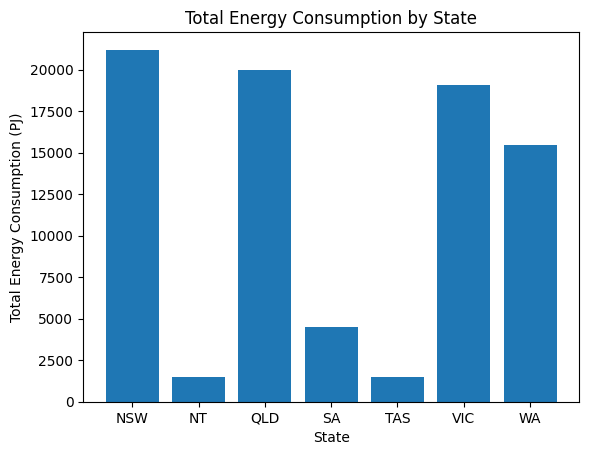

In [ ]:
plt.bar(states, total_comsum)
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by State')
plt.show()

In [ ]:
sql = '''
SELECT
    SUM("Coal (PJ)") AS Total_Coal,
    SUM("Oil (PJ)") AS Total_Oil,
    SUM("Gas (PJ)") AS Total_Gas,
    SUM("Renewables (PJ)") AS Total_Renewables
FROM AUS_energy;
'''
cur.execute(sql)
total_energy_by_fuel = cur.fetchone()
print(total_energy_by_fuel)


(26946.899999999994, 31130.0, 20049.6, 5054.9000000000015)


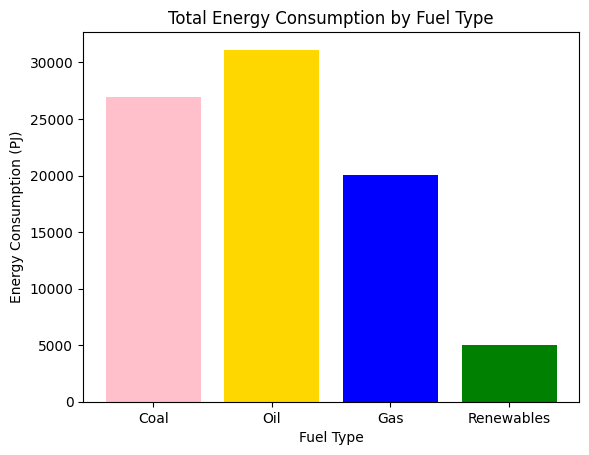

In [ ]:
fuel_types = ['Coal', 'Oil', 'Gas', 'Renewables']
energy_totals = [total_energy_by_fuel[0], total_energy_by_fuel[1], total_energy_by_fuel[2], total_energy_by_fuel[3]]

# Creating a bar chart

plt.bar(fuel_types, energy_totals, color=['pink', 'gold', 'blue', 'green'])
plt.title('Total Energy Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Energy Consumption (PJ)')
plt.show()